<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad2_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


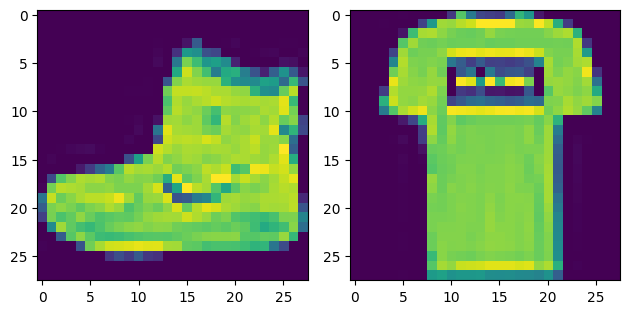

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Cargamos el conjunto de datos
fhasion=keras.datasets.fashion_mnist

#Dividimos los datos en entrenamiento y prueba
(train_images, train_labels), (test_images, test_label)=fhasion.load_data()

print(test_label[:30])

#Visualizamos los datos
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(train_images[1])
plt.tight_layout()
plt.show()

In [ ]:
#normalizacion de los datos
train_images=train_images/255
test_images=test_images/25

#creacion del modelo
model=keras.Sequential([
    #keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    #keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    #keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 256)         0

In [ ]:
#Compilacion del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Enrenamiento del modelo
history=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.2542 - accuracy: 0.9057
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2217 - accuracy: 0.9172
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1941 - accuracy: 0.9269
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1722 - accuracy: 0.9345
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1536 - accuracy: 0.9415


<Axes: >

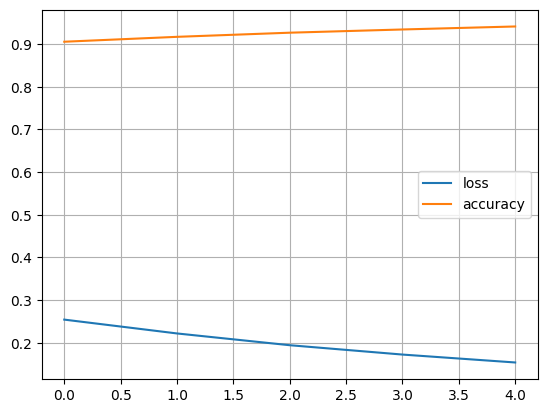

In [ ]:
#graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
#evaluar el modelo en el conjunto de prueba y en el conjunto de entrenamiento
loss, acuracy=model.evaluate(train_images,train_labels)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuracy}')

loss,accuracy = model.evaluate(test_images, test_label)
print("Perdida en el conjunto de Prueba: ", loss)
print("Acertacion en el conjunto de Prueba:", accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9549
perdida en el conjunto de entrenamiento: 0.12387676537036896
Precision en el conjunto de entrenamiento: 0.9549333453178406
313/313 [==============================] - 1s 4ms/step - loss: 3.5763 - accuracy: 0.7926
Perdida en el conjunto de Prueba:  3.576343059539795
Acertacion en el conjunto de Prueba: 0.7925999760627747


In [ ]:
#Prediccion
index=1
print(f'label {test_label[index]}')
clasificacion=model.predict(test_images[index:index+1])
print(f'prediccion: {(clasificacion.reshape(-1,1))}')

label 2
1/1 [==============================] - 0s 110ms/step
prediccion: [[2.7923022e-31]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [5.2382050e-38]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]


1/1 [==============================] - 0s 17ms/step


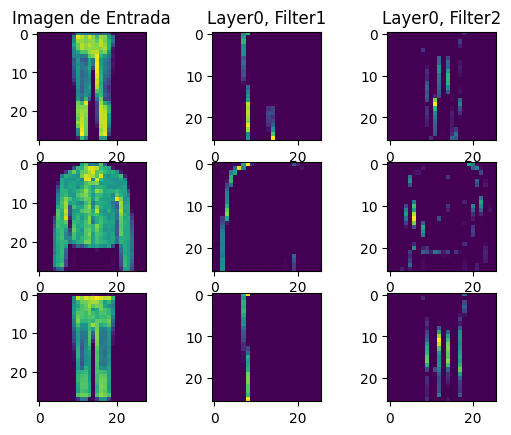

In [ ]:
#seleccion de imagenes de interes
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=15

layer=0
filter1=5
filter2=10

layer_ouput=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_ouput)

#Visualizacion de la capa convolucional
f, axarr=plt.subplots(3,3)

axarr[0,0].set_title('Imagen de Entrada')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+ str(layer)+', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+ str(layer)+', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f1=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f1[0,:,:,filter1])
axarr[1,2].imshow(f1[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
f1=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f1[0,:,:,filter1])
axarr[2,2].imshow(f1[0,:,:,filter2])

313/313 [==============================] - 1s 2ms/step


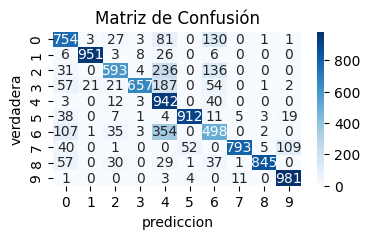

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#prediccion
prediccion_label=np.argmax(model.predict(test_images), axis=1) # Predict on the entire test set

#matriz de confusion
confusion=confusion_matrix(test_label,prediccion_label)

plt.figure(figsize=(4, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
#plt.imshow(confusion,interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('prediccion')
plt.ylabel('verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#f1
f1=f1_score(test_label,prediccion_label, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.7972108108030043


In [ ]:
# Reporte de clasificación (incluye precision, recall y f1-score para cada clase)
report = classification_report(test_label, prediccion_label)
print("Reporte de clasificación:\n", report)

# Distribución de errores
errors = prediccion_label != test_label
error_indices = np.where(errors)[0]

print(f"Total de errores: {len(error_indices)}")
print(f"Indices de errores: {error_indices}")

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.97      0.95      0.96      1000
           2       0.81      0.59      0.69      1000
           3       0.97      0.66      0.78      1000
           4       0.51      0.94      0.66      1000
           5       0.94      0.91      0.93      1000
           6       0.55      0.50      0.52      1000
           7       0.98      0.79      0.88      1000
           8       0.99      0.84      0.91      1000
           9       0.88      0.98      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.83      0.79      0.80     10000
weighted avg       0.83      0.79      0.80     10000

Total de errores: 2074
Indices de errores: [  17   20   23 ... 9981 9985 9991]
